### Text Pre-Processing

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentences = [
    'I Love my dog',
    'I love my cat',
    'You love my dog',
    "Google Launches GEMINI",
    "How was your day",
    "Its rainig heavily in chennai",
    "IPL Trading is going on",
    "Indian Cricket team leaves to South Africa",
    "Prime Minister Narendra Modi inaugurates Surat Diamond Bourse, World's largest office complex in Gujarat",
    "Kerala reports new COVID-19 variant JN.1 case that’s spreading in China, US: Health Ministry keeps vigil in states",
    "Honda Elevate has recorded 20,000 unit sales milestone in just 100 days since its market launch; powered by a 1.5L VTEC petrol engine"
    "This is an era of LLM's"
]

In [3]:

tokenizer = Tokenizer(num_words=100,oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [4]:
sequences = tokenizer.texts_to_sequences(sentences)

In [5]:
padded = pad_sequences(sequences)
print(word_index)

{'<OOV>': 1, 'in': 2, 'love': 3, 'my': 4, 'i': 5, 'dog': 6, 'its': 7, 'is': 8, '1': 9, 'cat': 10, 'you': 11, 'google': 12, 'launches': 13, 'gemini': 14, 'how': 15, 'was': 16, 'your': 17, 'day': 18, 'rainig': 19, 'heavily': 20, 'chennai': 21, 'ipl': 22, 'trading': 23, 'going': 24, 'on': 25, 'indian': 26, 'cricket': 27, 'team': 28, 'leaves': 29, 'to': 30, 'south': 31, 'africa': 32, 'prime': 33, 'minister': 34, 'narendra': 35, 'modi': 36, 'inaugurates': 37, 'surat': 38, 'diamond': 39, 'bourse': 40, "world's": 41, 'largest': 42, 'office': 43, 'complex': 44, 'gujarat': 45, 'kerala': 46, 'reports': 47, 'new': 48, 'covid': 49, '19': 50, 'variant': 51, 'jn': 52, 'case': 53, 'that’s': 54, 'spreading': 55, 'china': 56, 'us': 57, 'health': 58, 'ministry': 59, 'keeps': 60, 'vigil': 61, 'states': 62, 'honda': 63, 'elevate': 64, 'has': 65, 'recorded': 66, '20': 67, '000': 68, 'unit': 69, 'sales': 70, 'milestone': 71, 'just': 72, '100': 73, 'days': 74, 'since': 75, 'market': 76, 'launch': 77, 'powere

In [6]:
print(padded)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  5  3  4  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  5  3  4 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 11  3  4  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 12 13 14]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 15 16 17 18]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  7 19 20  2 21]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 22 23  8 24 25]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 26
  27 28 29 30 31 32]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 33 34 35 36 37 38 39 40
  41 42 43 44  2 45]
 [ 0  0  0  0  0  0  0  0  0  0 46 47 48 49 50 51 52  9 53 54 55  2 56 57
  58 59 60 61  2 62]
 [63 64 65 66 67 68 69 70 71  2 72 73 74 75  7 76 

Let's try this on Test Data

In [7]:
test_data = [
    "I really love my pet",
    "India makes it to Finals in ODI World cup 2023",
    "Jeff Bezos says he and Elon Musk are like-minded and loves the idea of them being friend",
    "what's up guys!!!"
]

In [8]:
test_seq = tokenizer.texts_to_sequences(test_data)
print("\n Padded Test Sequence: ", test_seq)


 Padded Test Sequence:  [[5, 1, 3, 4, 1], [1, 1, 1, 30, 1, 2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 87, 1, 1, 1], [1, 1, 1]]


In [9]:
padded_test = pad_sequences(test_seq)
print(padded_test)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  1  3  4  1]
 [ 0  0  0  0  0  0  0  0  1  1  1 30  1  2  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 87  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1]]


## **Sarcasm Detection**

In [10]:
import json
import tensorflow as tf

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
vocab_size = 10000
max_length = 100
oov_tok = "<OOV>"
trunc_type ="post"
padding_type = "post"

embedding_dim = 16
training_size = 20000

Fetching the Data

In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-12-17 14:31:45--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  25.7MB/s    in 0.2s    

2023-12-17 14:31:46 (25.7 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



Reading Data

In [14]:
with open("/tmp/sarcasm.json", 'r') as f:
    data = json.load(f)

sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [15]:
#print(sentences)

In [16]:
#print(labels)

Size of Data

In [17]:
print("Size of Sentences: ", len(sentences))
print("Size of Labels: ", len(labels))

Size of Sentences:  26709
Size of Labels:  26709


Let's see some random sentences and their Labels

In [18]:
print (sentences[0])
print (labels[0])
print("\n" + "-" * 60 + "\n")
print (sentences[12563])
print (labels[12563])
print("\n" + "-" * 60 + "\n")
print (sentences[25000])
print (labels[25000])

former versace store clerk sues over secret 'black code' for minority shoppers
0

------------------------------------------------------------

'syrians' lives are worthless,' obama tells daughters before kissing them goodnight
1

------------------------------------------------------------

college graduate to never read a book again
1


### Train Test Split

In [19]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Tokenization, Padding

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
print (training_padded[0])

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [22]:
training_padded.shape

(20000, 100)

In [23]:
testing_padded.shape

(6709, 100)

### Converting into Numpy arrays

In [24]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [25]:
print (training_padded)

[[ 328    1  799 ...    0    0    0]
 [   4 6840 3096 ...    0    0    0]
 [ 153  890    2 ...    0    0    0]
 ...
 [  79 1729    1 ...    0    0    0]
 [  53 5108 4735 ...    0    0    0]
 [ 312  705    1 ...    0    0    0]]


In [26]:
print (training_labels)

[0 0 1 ... 0 0 1]


### Custom Neural Network Architecture

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),  #------> Step 1: Creating big matrix of embedding size
    tf.keras.layers.GlobalAveragePooling1D(),                                       #------> step 2: converting this sparse big matrix into 1D layer
    tf.keras.layers.Dense(24,activation='relu'),                                    #------->step 3: this 1D layer is deeply connected with neural net of 24 neurons, with "RELU" as activation
    tf.keras.layers.Dense(1,activation='sigmoid')                                   #------->step 4: Final layer of neural net for classification, with "Sigmoid" as activation

])

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])     # Model compilation --> Binary cross Entropy, Adam Optimizer, Accuracy

### Let's see our Model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Let's train our Model, with 25 Epochs

In [29]:
num_epochs = 25
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels))

Epoch 1/25
625/625 [==============================] - 11s 13ms/step - loss: 0.6629 - accuracy: 0.5968 - val_loss: 0.5747 - val_accuracy: 0.7599
Epoch 2/25
625/625 [==============================] - 5s 8ms/step - loss: 0.4335 - accuracy: 0.8267 - val_loss: 0.3885 - val_accuracy: 0.8377
Epoch 3/25
625/625 [==============================] - 4s 7ms/step - loss: 0.3129 - accuracy: 0.8770 - val_loss: 0.3532 - val_accuracy: 0.8502
Epoch 4/25
625/625 [==============================] - 4s 6ms/step - loss: 0.2616 - accuracy: 0.8962 - val_loss: 0.3441 - val_accuracy: 0.8539
Epoch 5/25
625/625 [==============================] - 4s 6ms/step - loss: 0.2253 - accuracy: 0.9133 - val_loss: 0.3425 - val_accuracy: 0.8559
Epoch 6/25
625/625 [==============================] - 5s 8ms/step - loss: 0.1969 - accuracy: 0.9233 - val_loss: 0.3505 - val_accuracy: 0.8554
Epoch 7/25
625/625 [==============================] - 4s 6ms/step - loss: 0.1755 - accuracy: 0.9344 - val_loss: 0.3636 - val_accuracy: 0.8548
Epoc

### Let's Understand how accuracy & Loss varies w.r.t Epochs

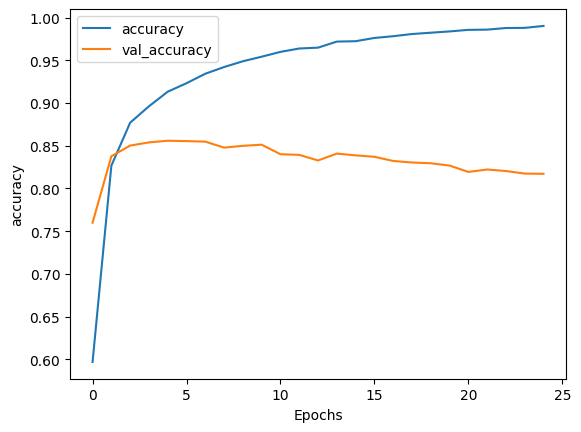

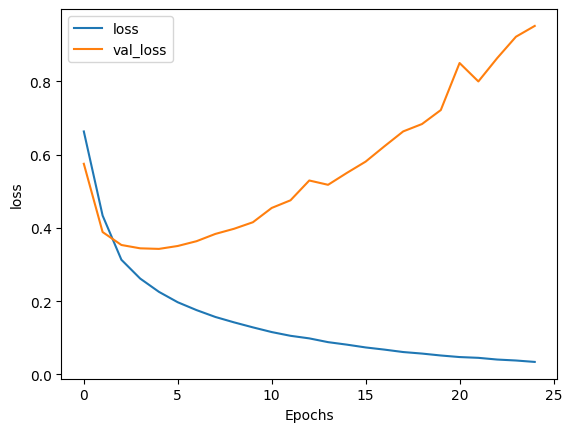

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

### Test with custom data, and predict probabilities

In [32]:
custom_data = ["I am myself a king of my state",
            "Unless your name is Google, stop acting like you know everything",
            "It was amazing Experience",
            "Data engineering is better then data science",
            "poor man becomes Millionare",
            "You are bald enough to have a haircut"]
custom_sequences = tokenizer.texts_to_sequences(custom_data)
custom_padded = pad_sequences(custom_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(custom_padded))

1/1 [==============================] - 0s 22ms/step
[[2.7781029e-08]
 [1.9229715e-03]
 [5.7763099e-03]
 [1.8526948e-09]
 [9.9879050e-01]
 [5.9463811e-01]]


### 5th  sentence is predicted with high probability, means they are sarcastic with higher probabilities when compared to other sentences